# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import os
import json

# Import API key
from api_keys import weather_api_key

# Configure gmaps with API key
gmaps.configure(api_key=weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination and store the results in cities list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

In [3]:
cities

['ca mau',
 'ukiah',
 'hailar',
 'bredasdorp',
 'praia da vitoria',
 'aswan',
 'grand centre',
 'barrow',
 'bluff',
 'omboue',
 'ushuaia',
 'new norfolk',
 'hilo',
 'busselton',
 'shuiji',
 'hermanus',
 'sande',
 'yellowknife',
 'severo-kurilsk',
 'ponta do sol',
 'mataura',
 'saleaula',
 'dolbeau',
 'ulfborg',
 'padang',
 'karratha',
 'rikitea',
 'hobart',
 'tucuman',
 'lovozero',
 'ngukurr',
 'puerto ayacucho',
 'tuktoyaktuk',
 'sing buri',
 'illoqqortoormiut',
 'weligama',
 'castro',
 'albany',
 'ribeira grande',
 'sao miguel do araguaia',
 'jerantut',
 'villa carlos paz',
 'east london',
 'salta',
 'batagay',
 'vostok',
 'fortuna',
 'narovchat',
 'mozelos',
 'kapaa',
 'lazaro cardenas',
 'nikolskoye',
 'stromness',
 'bama',
 'itaituba',
 'vestmannaeyjar',
 'jamestown',
 'delfzijl',
 'krasnoselkup',
 'cape town',
 'punta arenas',
 'namatanai',
 'bengkulu',
 'tessalit',
 'buala',
 'chokurdakh',
 'savannakhet',
 'thompson',
 'carnarvon',
 'presidencia roque saenz pena',
 'tabou',
 'gr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Save url query information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [5]:
# Set up lists to hold json response data
lat = []
long = []
temp_max = []
humidity = []
cloudiness = []
wind = []
city_name = []
country = []
date = []


In [6]:
# Print message to indicate that the data capturing loop is starting
print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Initialise counters
city_set = 1
rec = 0

# Loop through the list of cities and perform a json request for the required data on each city 
# This process will be taking a couple of minutes to complete as a sleep clock is set for every 50 json calls
for city in cities:
    
    # Managing exception handling
    try:
        
        # Making json call for the required data and store them in the lists to be used later on
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_max.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Set json call to sleep 60 seconds for every set of 50 cities and reset the record counter back to 0
        if rec > 49:
            city_set += 1
            rec = 0
            print(f"********* sleep 60s *********")
            time.sleep(60)
            
        print(f"Processing Record {rec} of Set {city_set} | {response['name']}")
        rec += 1
        
    # Exception handling for missing data
    except(KeyError, IndexError):
        print(f"City not found. Skipping...")
        pass

# Print message to indicate that the data capturing loop is completed
print(f"-----------------------------")
print(f"Data Retrieval Completed")      
print(f"-----------------------------")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Ca Mau
Processing Record 1 of Set 1 | Ukiah
Processing Record 2 of Set 1 | Hailar
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Praia da Vitória
Processing Record 5 of Set 1 | Aswān
City not found. Skipping...
Processing Record 6 of Set 1 | Barrow
Processing Record 7 of Set 1 | Bluff
Processing Record 8 of Set 1 | Omboué
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | New Norfolk
Processing Record 11 of Set 1 | Hilo
Processing Record 12 of Set 1 | Busselton
Processing Record 13 of Set 1 | Shuiji
Processing Record 14 of Set 1 | Hermanus
Processing Record 15 of Set 1 | Sande
Processing Record 16 of Set 1 | Yellowknife
Processing Record 17 of Set 1 | Severo-Kuril'sk
Processing Record 18 of Set 1 | Ponta do Sol
Processing Record 19 of Set 1 | Mataura
City not found. Skipping...
City not found. Skipping...
Processing Record 20 

Processing Record 30 of Set 4 | Wamba
Processing Record 31 of Set 4 | Khatanga
Processing Record 32 of Set 4 | Boa Vista
City not found. Skipping...
Processing Record 33 of Set 4 | Saldanha
City not found. Skipping...
Processing Record 34 of Set 4 | Esso
Processing Record 35 of Set 4 | Northam
Processing Record 36 of Set 4 | Yar-Sale
Processing Record 37 of Set 4 | Rome
Processing Record 38 of Set 4 | Totness
Processing Record 39 of Set 4 | Monrovia
Processing Record 40 of Set 4 | Burnie
Processing Record 41 of Set 4 | Marsabit
Processing Record 42 of Set 4 | Port Hedland
Processing Record 43 of Set 4 | Cidreira
Processing Record 44 of Set 4 | Chacabuco
Processing Record 45 of Set 4 | Vardø
Processing Record 46 of Set 4 | Eureka
Processing Record 47 of Set 4 | Ambilobe
Processing Record 48 of Set 4 | Nyagan
Processing Record 49 of Set 4 | Pilibanga
********* sleep 60s *********
Processing Record 0 of Set 5 | Flinders
Processing Record 1 of Set 5 | Alta
Processing Record 2 of Set 5 | Zo

Processing Record 18 of Set 8 | Planeta Rica
Processing Record 19 of Set 8 | Elko
Processing Record 20 of Set 8 | Kifrī
Processing Record 21 of Set 8 | College
Processing Record 22 of Set 8 | Leningradskiy
Processing Record 23 of Set 8 | São Filipe
Processing Record 24 of Set 8 | Sambalpur
Processing Record 25 of Set 8 | Mata
Processing Record 26 of Set 8 | Turukhansk
Processing Record 27 of Set 8 | Deputatsky
Processing Record 28 of Set 8 | Alexandria
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 8 | Natitingou
City not found. Skipping...
Processing Record 30 of Set 8 | Te Anau
Processing Record 31 of Set 8 | Salinópolis
Processing Record 32 of Set 8 | Corpus Christi
Processing Record 33 of Set 8 | Kieta
City not found. Skipping...
Processing Record 34 of Set 8 | Morondava
Processing Record 35 of Set 8 | Quetta
Processing Record 36 of Set 8 | Esmeraldas
Processing Record 37 of Set 8 | San Isidro
Processing Record 38 of Set 8 | Caravelas
Processing

Processing Record 0 of Set 12 | Aloleng
Processing Record 1 of Set 12 | Jacareacanga
Processing Record 2 of Set 12 | Maniitsoq
Processing Record 3 of Set 12 | Kaspiysk
Processing Record 4 of Set 12 | Kalāleh
Processing Record 5 of Set 12 | Columbus
Processing Record 6 of Set 12 | Feijó
Processing Record 7 of Set 12 | Abapó
Processing Record 8 of Set 12 | Teahupoo
Processing Record 9 of Set 12 | Siderno
Processing Record 10 of Set 12 | Vieux-Habitants
Processing Record 11 of Set 12 | Dongsheng
Processing Record 12 of Set 12 | Russellville
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 12 | Shāmgarh
Processing Record 14 of Set 12 | Mount Gambier
Processing Record 15 of Set 12 | Erzin
Processing Record 16 of Set 12 | Byron Bay
Processing Record 17 of Set 12 | Juba
Processing Record 18 of Set 12 | Kisanga
Processing Record 19 of Set 12 | Enid
Processing Record 20 of Set 12 | Bathsheba
Processing Record 21 of Set 12 | Rutland
----------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a new weather dataframe by pulling data from various lists as the result of json calls above
weather_data = pd.DataFrame({"City" : city_name, 
                           "Lat" : lat,
                           "Lng" : long,
                           "Max Temp": temp_max,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind,
                           "Country": country,
                           "Date": date})

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ca Mau,9.1769,105.1500,83.37,66,99,12.35,VN,1639706254
1,Ukiah,39.1502,-123.2078,44.73,95,9,2.82,US,1639706278
2,Hailar,49.2000,119.7000,-6.90,90,17,9.31,CN,1639706278
3,Bredasdorp,-34.5322,20.0403,57.27,69,7,17.43,ZA,1639706278
4,Praia da Vitória,38.7333,-27.0667,62.85,88,75,26.96,PT,1639706278


In [8]:
# Check the length of weather_data dataframe
len(weather_data)

572

In [9]:
# Output the weather_data to csv file for completing part2 of this homework
weather_data.to_csv("output_data/cities.csv", encoding='utf-8', index=False)

In [10]:
# Show stats of the weather dataframe
weather_stats = weather_data[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.942680,19.017722,51.457115,75.295455,60.973776,7.555822,1.639707e+09
std,32.800326,88.007480,30.327424,20.750333,39.301845,5.732981,2.575995e+02
min,-54.800000,-179.166700,-48.170000,2.000000,0.000000,0.000000,1.639706e+09
25%,-6.133700,-58.671850,35.595000,66.750000,20.000000,3.252500,1.639706e+09
50%,22.601800,23.958300,60.605000,80.000000,75.000000,6.250000,1.639707e+09
75%,46.518350,95.379150,74.862500,91.000000,100.000000,10.200000,1.639707e+09
max,78.218600,178.416700,103.530000,100.000000,100.000000,34.520000,1.639707e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Check & get the indices of the cities that have humidity over 100%.
cities_humid_over100 = weather_data[weather_data['Humidity'] >100].index
print(cities_humid_over100)

Int64Index([], dtype='int64')


In [12]:
# Skip inpsecting data step if there is no city with humidity > 100%
if len(cities_humid_over100) > 0:
    print(weather_data[weather_data['Humidity'] > 100].describe())


In [13]:
# Make a new DataFrame equal to the city data and drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = []
clean_city_data = weather_data.drop(weather_data.index[weather_data['Humidity'] > 100], inplace = False)
weather_df = clean_city_data

# Display first 10 rows of data
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ca Mau,9.1769,105.1500,83.37,66,99,12.35,VN,1639706254
1,Ukiah,39.1502,-123.2078,44.73,95,9,2.82,US,1639706278
2,Hailar,49.2000,119.7000,-6.90,90,17,9.31,CN,1639706278
3,Bredasdorp,-34.5322,20.0403,57.27,69,7,17.43,ZA,1639706278
4,Praia da Vitória,38.7333,-27.0667,62.85,88,75,26.96,PT,1639706278
5,Aswān,24.0934,32.9070,54.86,50,100,9.06,EG,1639706274
6,Barrow,71.2906,-156.7887,-9.38,77,75,27.63,US,1639706279
7,Bluff,-46.6000,168.3333,61.81,69,79,26.28,NZ,1639706078
8,Omboué,-1.5746,9.2618,73.67,88,100,3.83,GA,1639706280
9,Ushuaia,-54.8000,-68.3000,46.06,87,90,6.91,AR,1639706280


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
# Get and format the current date
temp_date = dt.datetime.today().strftime("%m/%d/%Y")

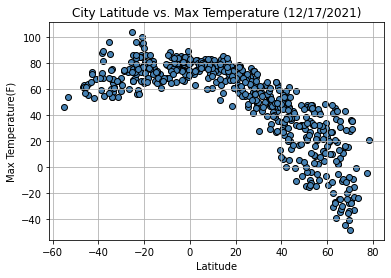

In [15]:
# Plot scatter graph, label the graph, axises, and save the output image to folder "output_images"
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature " + "(" + temp_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

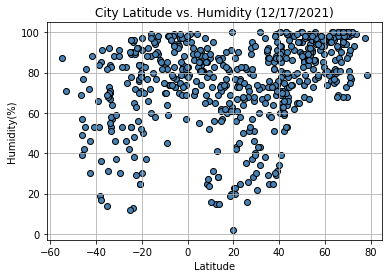

In [16]:
# Plot scatter graph, label the graph, axises, and save the output image to folder "output_images"
plt.scatter(weather_df['Lat'], weather_df['Humidity'], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity " + "(" + temp_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

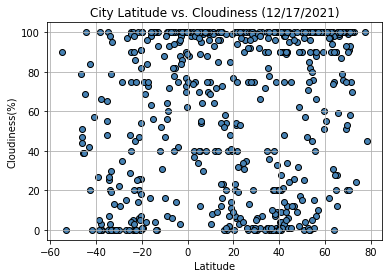

In [17]:
# Plot scatter graph, label the graph, axises, and save the output image to folder "output_images"
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness " + "(" + temp_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

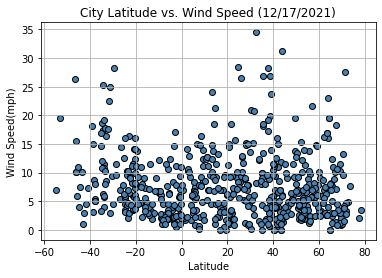

In [18]:
# Plot scatter graph, label the graph, axises, and save the output image to folder "output_images"
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed " + "(" + temp_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# Create new dataframe to hold data for weather in northen hemisphere with latitude >= 0
northern_hem = weather_df[weather_df['Lat'] >= 0]
northern_hem 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ca Mau,9.1769,105.1500,83.37,66,99,12.35,VN,1639706254
1,Ukiah,39.1502,-123.2078,44.73,95,9,2.82,US,1639706278
2,Hailar,49.2000,119.7000,-6.90,90,17,9.31,CN,1639706278
4,Praia da Vitória,38.7333,-27.0667,62.85,88,75,26.96,PT,1639706278
5,Aswān,24.0934,32.9070,54.86,50,100,9.06,EG,1639706274
...,...,...,...,...,...,...,...,...,...
565,Erzin,36.9559,36.2000,39.92,73,10,3.78,TR,1639707129
567,Juba,4.8517,31.5825,75.85,55,97,3.49,SS,1639707130
569,Enid,36.3956,-97.8784,39.58,58,1,8.05,US,1639707130
570,Bathsheba,13.2167,-59.5167,79.41,69,40,24.16,BB,1639707131


The r-value is: -0.8424623704492061


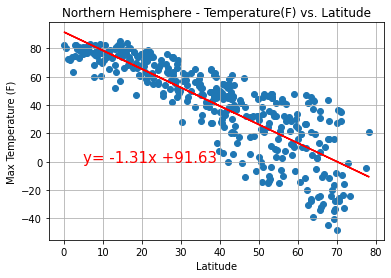

In [20]:
# Plot scatter graph
plt.scatter(northern_hem['Lat'], northern_hem['Max Temp'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem['Lat'], northern_hem['Max Temp']) 
regress_val = northern_hem['Lat'] * slope + intercept
plt.plot(northern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (5,0), fontsize=15, color="red")

# Label & title the graph
plt.title("Northern Hemisphere - Temperature(F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Nothern_Hemishphere Latitude vs Max Temperature.png")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
# Create new dataframe to hold data for weather in southern hemisphere with latitude < 0
southern_hem = weather_df[weather_df['Lat'] < 0]
southern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Bredasdorp,-34.5322,20.0403,57.27,69,7,17.43,ZA,1639706278
7,Bluff,-46.6000,168.3333,61.81,69,79,26.28,NZ,1639706078
8,Omboué,-1.5746,9.2618,73.67,88,100,3.83,GA,1639706280
9,Ushuaia,-54.8000,-68.3000,46.06,87,90,6.91,AR,1639706280
10,New Norfolk,-42.7826,147.0587,72.64,30,84,3.00,AU,1639706280
...,...,...,...,...,...,...,...,...,...
557,Abapó,-18.8333,-63.4667,65.64,83,69,4.61,BO,1639707126
558,Teahupoo,-17.8333,-149.2667,80.56,77,84,10.94,PF,1639707126
564,Mount Gambier,-37.8333,140.7667,89.22,17,66,7.94,AU,1639707129
566,Byron Bay,-28.6500,153.6167,74.35,83,35,9.64,AU,1639706990


The r-value is: 0.4591713831354327


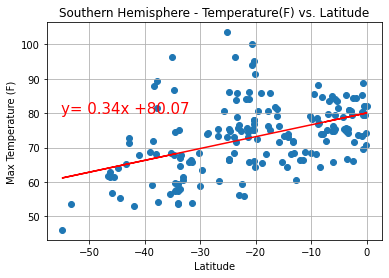

In [22]:
# Plot scatter graph
plt.scatter(southern_hem['Lat'], southern_hem['Max Temp'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem['Lat'], southern_hem['Max Temp']) 
regress_val = southern_hem['Lat'] * slope + intercept
plt.plot(southern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (-55,80), fontsize=15, color="red")

# Label & title the graph
plt.title("Southern Hemisphere - Temperature(F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Southern_Hemishphere Latitude vs Max Temperature.png")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39677766220690286


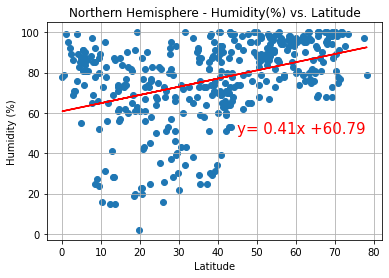

In [23]:
# Plot scatter graph
plt.scatter(northern_hem['Lat'], northern_hem['Humidity'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem['Lat'], northern_hem['Humidity']) 
regress_val = northern_hem['Lat'] * slope + intercept
plt.plot(northern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (45,50), fontsize=15, color="red")

# Label & title the graph
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Northen_Hemisphere Latitude vs Humidity.png")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4207836964730914


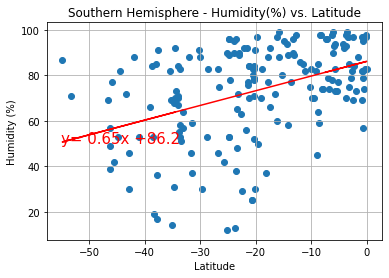

In [24]:
# Plot scatter graph
plt.scatter(southern_hem['Lat'], southern_hem['Humidity'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem['Lat'], southern_hem['Humidity']) 
regress_val = southern_hem['Lat'] * slope + intercept
plt.plot(southern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (-55,50), fontsize=15, color="red")

# Label & title the graph
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Southen_Hemisphere Latitude vs Humidity.png")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10936831811450326


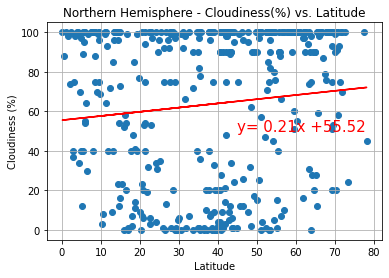

In [25]:
# Plot scatter graph
plt.scatter(northern_hem['Lat'], northern_hem['Cloudiness'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem['Lat'], northern_hem['Cloudiness']) 
regress_val = northern_hem['Lat'] * slope + intercept
plt.plot(northern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (45,50), fontsize=15, color="red")

# Label & title the graph
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Northen_Hemisphere Latitude vs Cloudiness.png")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4327154128285524


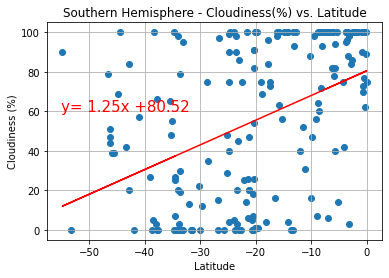

In [26]:
# Plot scatter graph
plt.scatter(southern_hem['Lat'], southern_hem['Cloudiness'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem['Lat'], southern_hem['Cloudiness']) 
regress_val = southern_hem['Lat'] * slope + intercept
plt.plot(southern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (-55,60), fontsize=15, color="red")

# Label & title the graph
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Southen_Hemisphere Latitude vs Cloudiness.png")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06449276592523659


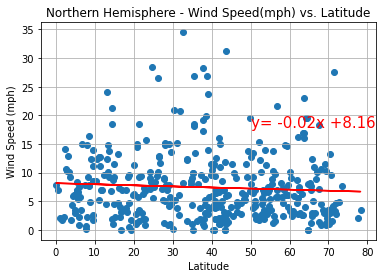

In [27]:
# Plot scatter graph
plt.scatter(northern_hem['Lat'], northern_hem['Wind Speed'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem['Lat'], northern_hem['Wind Speed']) 
regress_val = northern_hem['Lat'] * slope + intercept
plt.plot(northern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (50,18), fontsize=15, color="red")

# Label & title the graph
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Northen_Hemisphere Latitude vs Wind Speed.png")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4102886600402226


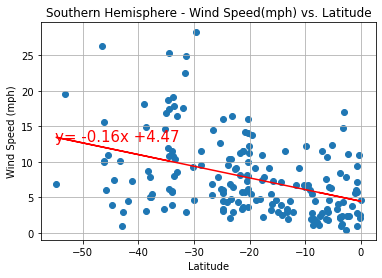

In [28]:
# Plot scatter graph
plt.scatter(southern_hem['Lat'], southern_hem['Wind Speed'])

# Plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem['Lat'], southern_hem['Wind Speed']) 
regress_val = southern_hem['Lat'] * slope + intercept
plt.plot(southern_hem['Lat'], regress_val, "r-") 

# Add regression line to the graph
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")

# Label & title the graph
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Output graph to file
plt.savefig("output_images/Southen_Hemisphere Latitude vs Wind Speed.png")

print(f"The r-value is: {rvalue}")